In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize


In [9]:
cum_rets = pd.read_csv('./USO.csv', index_col=0, parse_dates=True)

print(cum_rets.head()) 

                 USO
Date                
2007-01-03 -0.042636
2007-01-04 -0.040688
2007-01-05  0.009285
2007-01-08 -0.007109
2007-01-09 -0.004001


In [22]:
cum_rets = pd.read_csv('./cut_rates.csv', index_col=0, parse_dates=True)

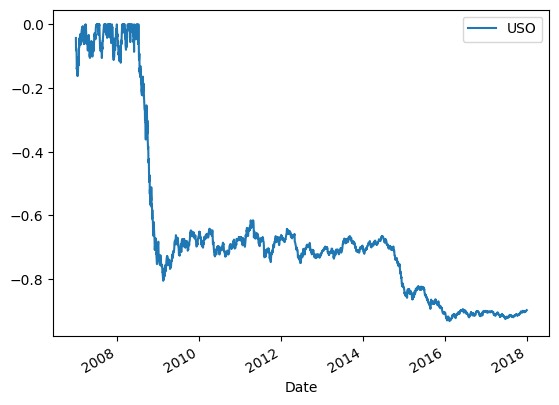

In [23]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

In [26]:
StockReturns_perc = pd.read_csv('./USO.csv', index_col=0, parse_dates=True)
StockReturns_perc = StockReturns_perc.USO*100

-3.608233764037496


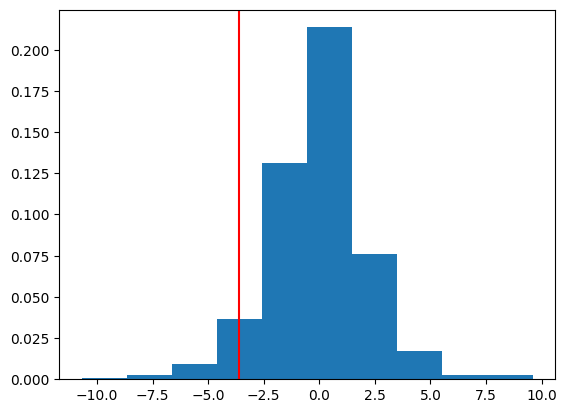

In [27]:
# Calculate historical VaR(95)
import numpy as np
var_95 = np.percentile(StockReturns_perc, 5)
print(var_95)

# Sort the returns for plotting
sorted_rets = np.sort(StockReturns_perc)

# Plot the probability of each sorted return quantile
import matplotlib.pyplot as plt
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))

plt.show()

Very good! Historical VaR(95) = -3.61%

-5.054143158346777


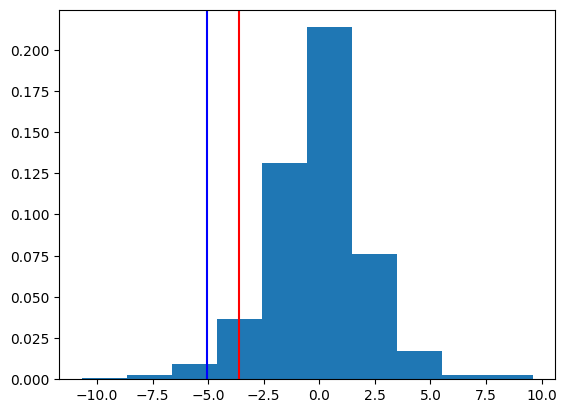

In [29]:
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

Nice! Notice how the CVaR(95) of -5.05% was more extreme than the VaR(95) level?

In [31]:
def plot_hist():
    plt.hist(sorted_rets, density=True, stacked=True)
    # Charting parameters
    plt.xlabel('Returns (%)')
    plt.ylabel('Probability')
    plt.title('Historical Distribution of USO Returns', fontsize=18, fontweight='bold')
    plt.axvline(x=var_90, color='r', linestyle='-', label="VaR 90: {0:.2f}%".format(var_90))
    plt.axvline(x=var_95, color='g', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
    plt.axvline(x=var_99, color='b', linestyle='-', label="VaR 99: {0:.2f}%".format(var_99))
    plt.axvline(x=cvar_90, color='r', linestyle='--', label="CVaR 90: {0:.2f}%".format(cvar_90))
    plt.axvline(x=cvar_95, color='g', linestyle='--', label="CVaR 95: {0:.2f}%".format(cvar_95))
    plt.axvline(x=cvar_99, color='b', linestyle='--', label="CVaR 99: {0:.2f}%".format(cvar_99))
    plt.legend(loc='upper right')
    plt.show()

-2.558512646965176
-4.043186770518807


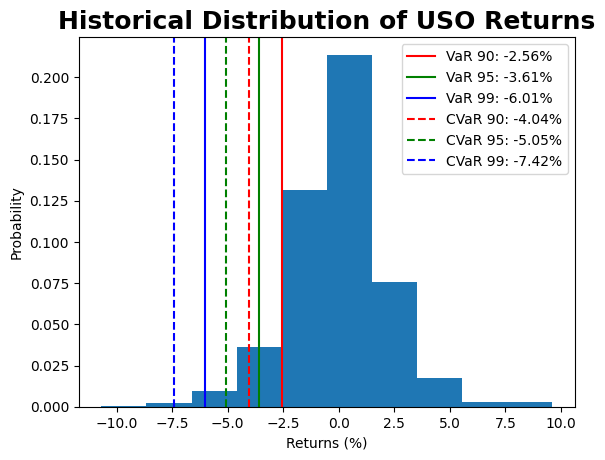

In [34]:
# Historical VaR(90) quantiles
var_90 = np.percentile(StockReturns_perc, q=10)
var_99 = np.percentile(StockReturns_perc, q=1)
print(var_90)

# Historical CVaR(90) quantiles
cvar_90 = StockReturns_perc[StockReturns_perc <= var_90].mean()
cvar_99 = StockReturns_perc[StockReturns_perc <= var_99].mean()
print(cvar_90)

# Plot to compare
plot_hist()

Well done! The CVaR(90) is -4.04%, which is higher than the VaR(90) of -2.56%.

In [48]:
StockReturns = pd.read_csv('./USO.csv', index_col=0, parse_dates=True)
StockReturns.head()

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.040688
2007-01-05,0.009285
2007-01-08,-0.007109
2007-01-09,-0.004001


In [49]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(StockReturns)

# Estimate the daily volatility
vol = np.std(StockReturns)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95[0]))

Mean:  -0.00028638956240214787 
Volatility:  USO    0.021888
dtype: float64 
VaR(95):  -0.03628908906473361


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [51]:
def plot_var_scale():
    # Plot the forecased vs time
    plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
    plt.xlabel('Time Horizon T+i')
    plt.ylabel('Forecasted VaR 95 (%)')
    plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
    plt.show()

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_27264\3271258668.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecasted_values[i, 1] = var_95*np.sqrt(i+1)


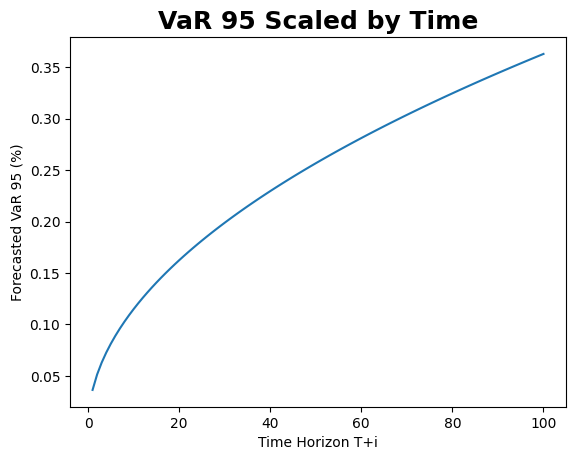

In [52]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i+1
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95*np.sqrt(i+1)

# Plot the results
plot_var_scale()

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_27264\2054566946.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecasted_values[i, 1] = var_95*np.sqrt(i+1)


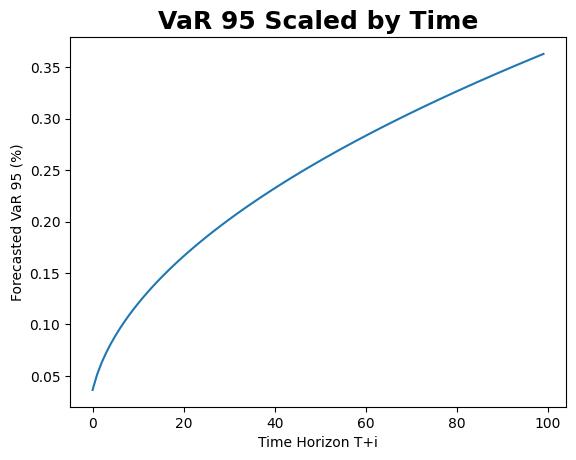

In [53]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(0, 100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95*np.sqrt(i+1)
    
# Plot the results
plot_var_scale()

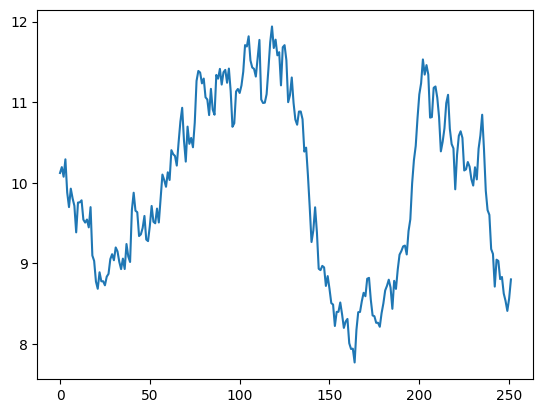

In [54]:
# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = rand_rets.cumprod() * S0

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

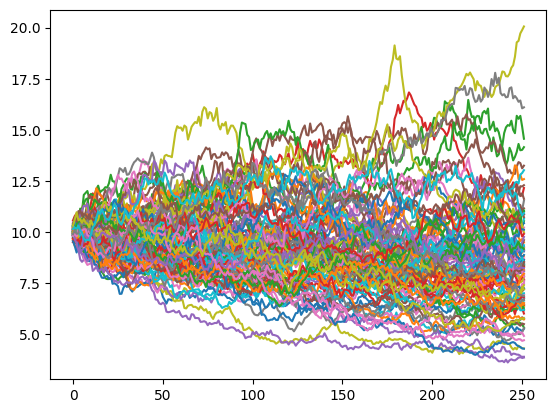

In [55]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu,vol,T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

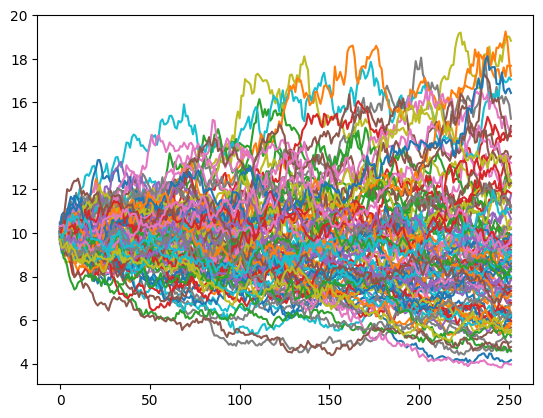

In [56]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu,vol,T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [57]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.12 %
